In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('datasets/job_dataset.csv')

In [2]:
data.head()

,JobID,Title,ExperienceLevel,YearsOfExperience,Skills,Responsibilities,Keywords
0,NET-F-001,.NET Developer,Fresher,0-1,C#; VB.NET basics; .NET Framework; .NET Core f...,Assist in coding and debugging applications; L...,.NET; C#; ASP.NET MVC; Entity Framework; SQL S...
1,NET-F-002,.NET Developer,Fresher,0-1,C#; .NET Framework basics; ASP.NET; Razor; HTM...,Write simple C# programs under guidance; Suppo...,.NET; C#; ASP.NET MVC; Entity Framework; SQL S...
2,NET-F-003,.NET Developer,Fresher,0-1,C#; VB.NET basics; .NET Core; ASP.NET MVC; HTM...,Contribute to development of small modules; As...,.NET; C#; ASP.NET MVC; SQL Server; Entity Fram...
3,NET-F-004,.NET Developer,Fresher,0-1,C#; .NET Framework; ASP.NET basics; SQL Server...,Support in software design documentation; Assi...,.NET; C#; SQL Server; Entity Framework; ASP.NET
4,NET-F-005,.NET Developer,Fresher,0-1,C#; ASP.NET; MVC; Entity Framework basics; SQL...,Learn to design and build ASP.NET applications...,.NET; C#; ASP.NET MVC; Entity Framework; SQL S...


In [3]:
data.isnull().sum()

JobID                0
Title                1
ExperienceLevel      0
YearsOfExperience    0
Skills               0
Responsibilities     0
Keywords             0
dtype: int64

In [4]:
data.dropna(subset=['Title'], inplace=True)
data = data.drop('JobID', axis=1)

In [5]:
data['Title'].value_counts()

Title
.NET Developer                 20
AI Prompt Engineer             20
AR/VR Developer                20
Business Analyst               20
Data Engineer                  20
                               ..
Senior Interaction Designer     1
UX Consultant                   1
UX Strategist                   1
UX Design Lead                  1
Staff UX Designer               1
Name: count, Length: 218, dtype: int64

In [6]:
data['Responsibilities'].value_counts()

Responsibilities
Define and drive product strategy; Collaborate with engineering, design, and marketing teams; Analyze product metrics and conduct experiments; Lead agile ceremonies; Engage stakeholders and manage expectations; Mentor junior PMs                                                                                                      3
Drive product vision and roadmap; Lead cross-functional teams; Oversee product analytics and experiments; Conduct user research; Ensure agile best practices; Manage stakeholder communication; Optimize product performance metrics                                                                                                      3
Define and drive product strategy; Lead product roadmap execution; Collaborate across teams; Conduct user research and analyze metrics; Ensure agile best practices; Engage stakeholders; Optimize product growth                                                                                                              

In [7]:
data = data.drop('Responsibilities', axis=1)

In [8]:
data['ExperienceLevel'].value_counts()

ExperienceLevel
Experienced         476
Fresher             363
Entry-Level          66
Senior-Level         65
Mid-Level            60
Senior               15
Lead                  7
Junior                5
Mid-level             5
Mid-Senior Level      3
Mid-Senior            2
Name: count, dtype: int64

In [9]:
data['Skills'].value_counts()

Skills
Salesforce; HubSpot; Predictive Analytics; Lead Generation; Negotiation; Closing Techniques; Sales Automation; Social Selling; Data-driven Sales; Relationship Management               6
Technical Writing; Editing; Proofreading; Adobe FrameMaker; MadCap Flare; CMS; HTML/CSS/XML; AI Writing Tools; Version Control; Agile Documentation                                     5
Salesforce; HubSpot; Lead Generation; Negotiation; Closing Deals; Pipeline Management; Product Demos; Sales Forecasting; Social Selling; Time Management                                5
Advanced Technical Writing; Structured Authoring; API Documentation; Adobe FrameMaker; MadCap Flare; XML/HTML/CSS; CMS; AI-assisted Documentation; Version Control; UX Documentation    5
Clear Writing; Proofreading; Basic HTML/CSS; Research Skills; CMS Basics; Markdown; Collaboration; Time Management; Attention to Detail; Adaptability                                   4
                                                               

In [10]:
data['YearsOfExperience'].value_counts()

YearsOfExperience
0-1           247
0–1 year      104
5+             49
0              48
2-5            35
             ... 
5–7 years       1
1–3 years       1
13-17           1
7–10 years      1
7-9             1
Name: count, Length: 110, dtype: int64

In [11]:
data['Keywords'].value_counts()

Keywords
JavaScript; TypeScript; React; Node.js; Jest; Webpack; Redux; CI/CD; Docker                                                                                             15
Unity; Unreal Engine; C#; ARKit; ARCore; 3D Graphics; Spatial Computing; Performance Optimization; Cross-Platform; Machine Learning                                     15
C++; C#; Unity; Unreal Engine; Game AI; Shader Programming; Multiplayer; Performance Optimization                                                                       15
Product Strategy; Data-Driven Decisions; Roadmapping; Agile Leadership; Stakeholder Management; User-Centered Design; Growth Metrics; Cross-Functional Collaboration    15
Ethical Hacking; Penetration Testing; Network Security; Python; Linux; Windows Security; Metasploit; Burp Suite; Cryptography; Malware Analysis                         14
                                                                                                                                        

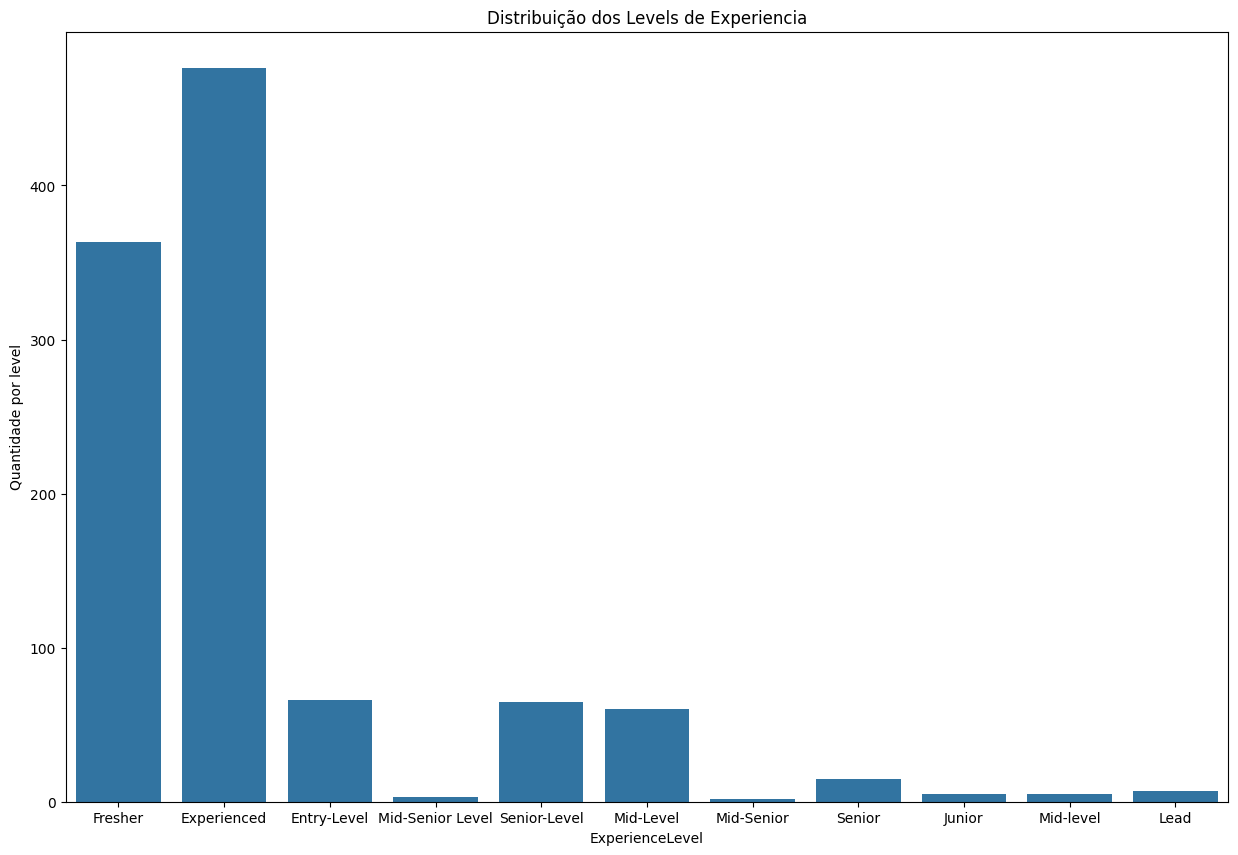

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(x='ExperienceLevel', data=data)
plt.title('Distribuição dos Levels de Experiencia')
plt.ylabel('Quantidade por level')
plt.show()

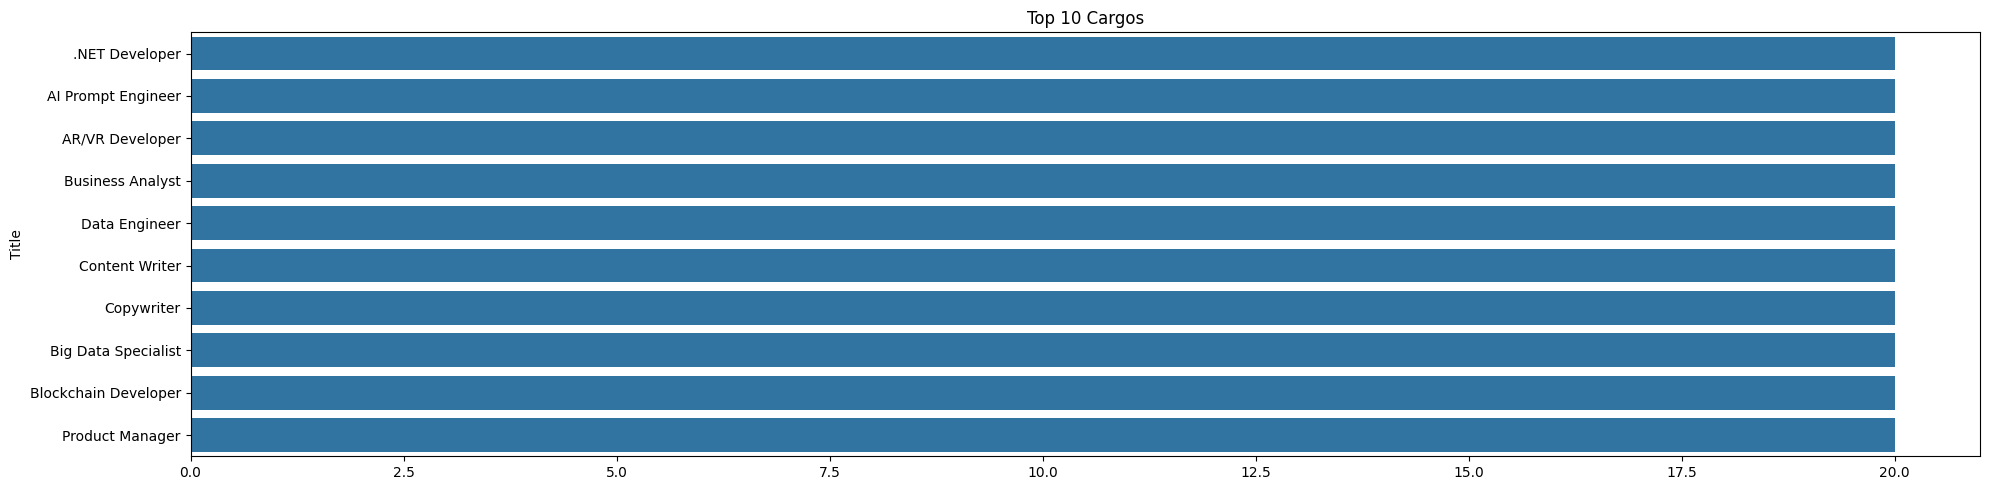

In [13]:
title = data['Title'].value_counts().head(10)

plt.figure(figsize=(20,5))
sns.barplot(x=title.values, y=title.index)
plt.title('Top 10 Cargos')
plt.tight_layout()


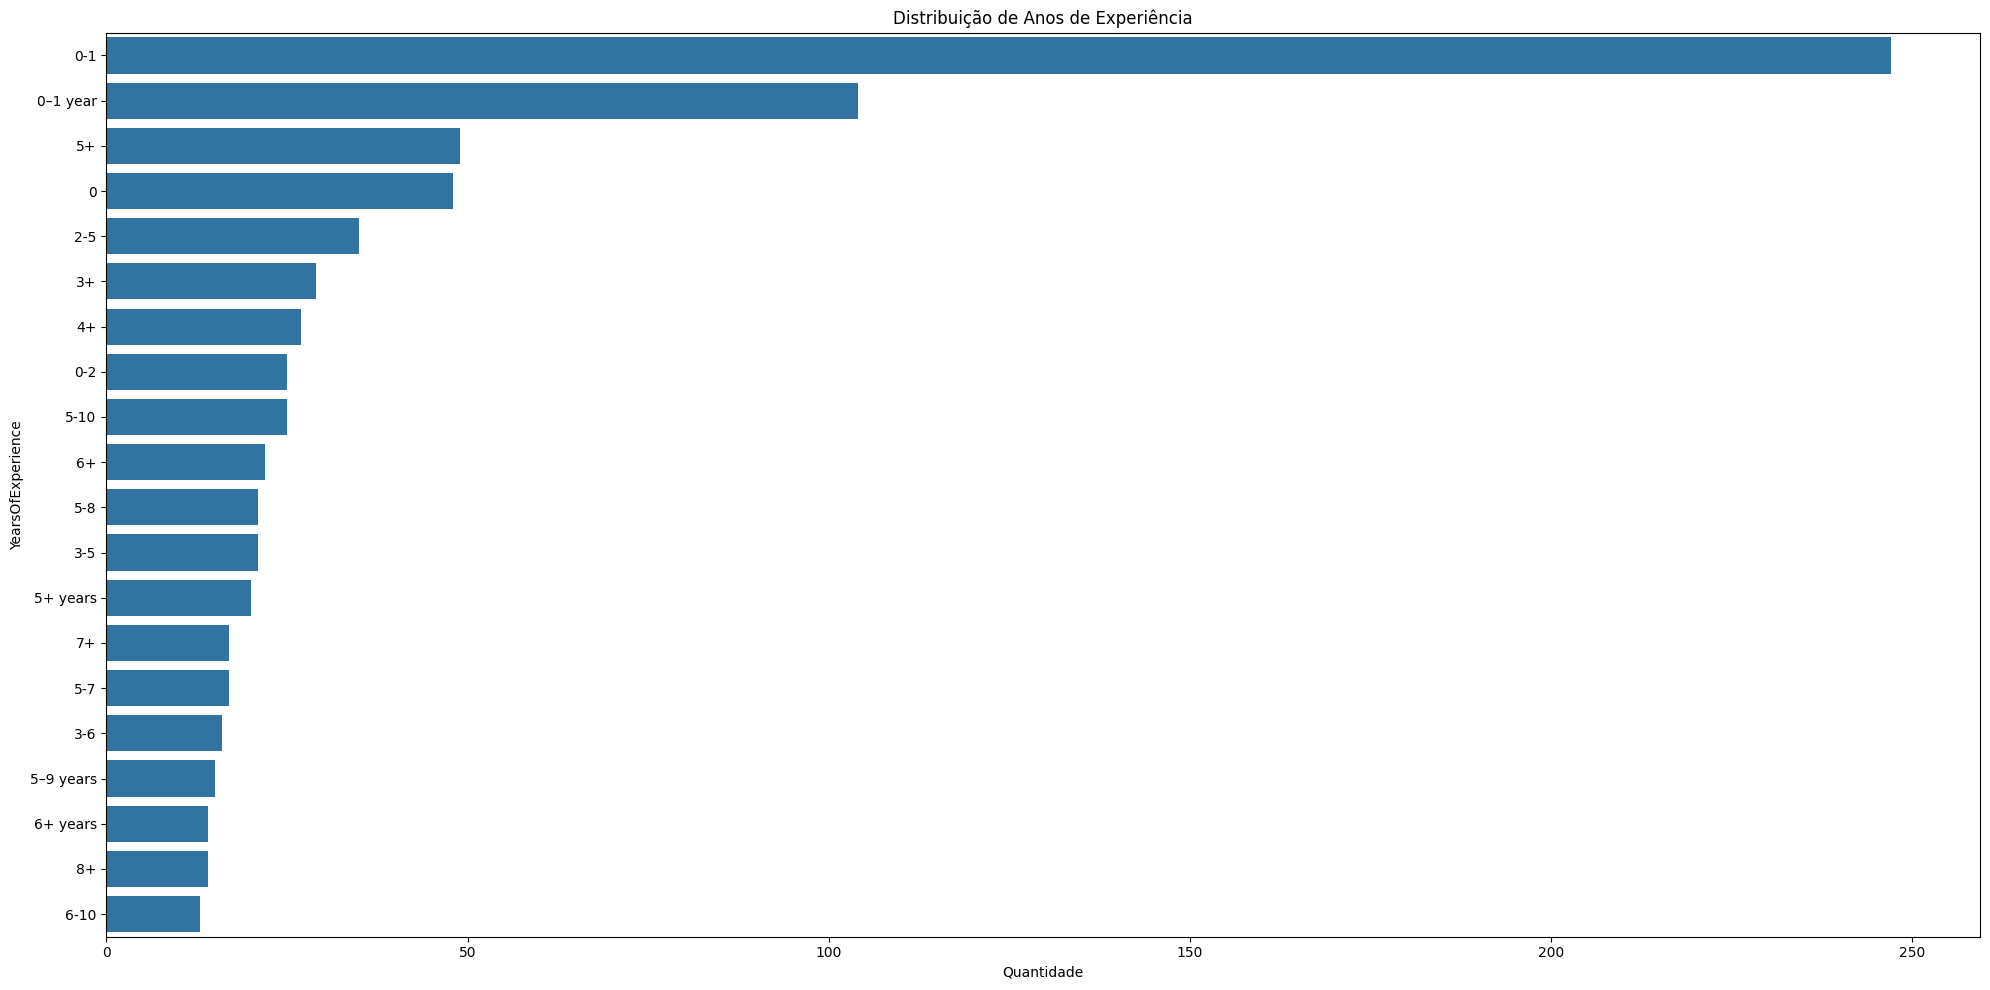

In [14]:
xp = data['YearsOfExperience'].value_counts().head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=xp.values, y=xp.index)
plt.title('Distribuição de Anos de Experiência')
plt.xlabel('Quantidade')
plt.tight_layout()

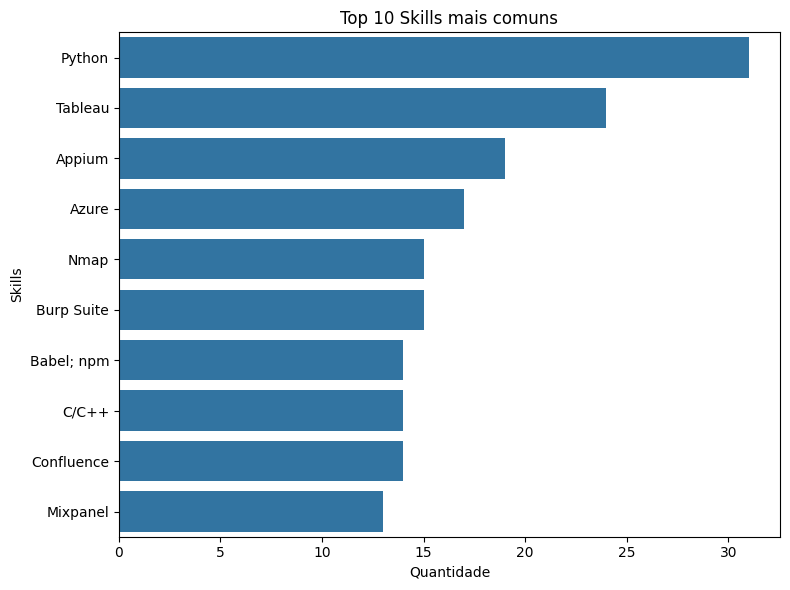

In [15]:
skills = data["Skills"].dropna().str.split(",").explode().str.strip().value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=skills.values, y=skills.index)
plt.title('Top 10 Skills mais comuns')
plt.xlabel('Quantidade')
plt.tight_layout()

In [16]:
xp = {
    'Experienced': 'Experienced',
    'Fresher': 'Fresher',
    'Entry-Level': 'Entry-Level',
    'Senior-Level': 'Senior',
    'Mid-Level': 'Mid-Level',
    'Senior': 'Senior',
    'Lead': 'Lead',
    'Junior': 'Junior',
    'Mid-level': 'Mid-Level',
    'Mid-Senior Level': 'Mid-Level',
    'Mid-Senior': 'Mid-Level'
}

data['ExperienceLevel'] = data['ExperienceLevel'].replace(xp)

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = ['Title', 'Keywords', 'YearsOfExperience', 'Skills', 'ExperienceLevel']

for col in cols:
    data[col] = le.fit_transform(data[col])

In [18]:
X = data.drop('ExperienceLevel', axis=1)
y = data['ExperienceLevel']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
score

0.9781931464174455

In [20]:
y_test[1:5]

248    1
942    1
716    1
759    0
Name: ExperienceLevel, dtype: int64

In [21]:
X_test[1:5]

,Title,YearsOfExperience,Skills,Keywords
248,44,75,249,136
942,181,48,570,402
716,145,45,131,448
759,148,4,564,517


In [22]:
y_pred = model.predict(X_test[1:5])

y_pred

array([1, 1, 1, 0])

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 0.102803738317757
MSE: 0.48909657320872274


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_rf = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[ 25   0   0   0   0   0   0]
 [  0 137   0   0   0   1   4]
 [  0   0 108   0   0   0   0]
 [  0   0   0   1   0   0   0]
 [  0   0   0   0   1   0   0]
 [  0   1   0   0   0  17   0]
 [  0   1   0   0   0   0  25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.99      0.96      0.98       142
           2       1.00      1.00      1.00       108
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.94      0.94      0.94        18
           6       0.86      0.96      0.91        26

    accuracy                           0.98       321
   macro avg       0.97      0.98      0.98       321
weighted avg       0.98      0.98      0.98       321

